In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [120]:
df=pd.read_excel('population_total.xlsx')

In [45]:
df.shape

(197, 302)

In [46]:
df.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,Afghanistan,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,...,76.6M,76.4M,76.3M,76.1M,76M,75.8M,75.6M,75.4M,75.2M,74.9M
1,Angola,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,...,168M,170M,172M,175M,177M,179M,182M,184M,186M,188M
2,Albania,400k,402k,404k,405k,407k,409k,411k,413k,414k,...,1.33M,1.3M,1.27M,1.25M,1.22M,1.19M,1.17M,1.14M,1.11M,1.09M
3,Andorra,2650,2650,2650,2650,2650,2650,2650,2650,2650,...,63k,62.9k,62.9k,62.8k,62.7k,62.7k,62.6k,62.5k,62.5k,62.4k
4,United Arab Emirates,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,...,12.3M,12.4M,12.5M,12.5M,12.6M,12.7M,12.7M,12.8M,12.8M,12.9M


In [121]:
df=df.melt(id_vars=['country'],var_name='Year',value_name='total_population')

In [48]:
df.head()

,country,Year,total_population
0,Afghanistan,1800,3.28M
1,Angola,1800,1.57M
2,Albania,1800,400k
3,Andorra,1800,2650
4,United Arab Emirates,1800,40.2k


In [49]:
df.describe()

,country,Year,total_population
count,59297,59297,59297
unique,197,301,4752
top,Lebanon,2100,10.3M
freq,301,197,115


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59297 entries, 0 to 59296
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   country           59297 non-null  object
 1   Year              59297 non-null  object
 2   total_population  59297 non-null  object
dtypes: object(3)
memory usage: 1.4+ MB


In [122]:
df['total_population'] = df['total_population'].replace({'M': 'e6', 'k': 'e3','B':'e9'}, regex=True)
df['total_population'] = pd.to_numeric(df['total_population'])

In [52]:
df.head(20)

,country,Year,total_population
0,Afghanistan,1800,3280000.0
1,Angola,1800,1570000.0
2,Albania,1800,400000.0
3,Andorra,1800,2650.0
4,United Arab Emirates,1800,40200.0
5,Argentina,1800,534000.0
6,Armenia,1800,413000.0
7,Antigua and Barbuda,1800,37000.0
8,Australia,1800,200000.0
9,Austria,1800,3000000.0


In [123]:
df['Year'] = pd.to_numeric(df['Year'])

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59297 entries, 0 to 59296
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   country           59297 non-null  object 
 1   Year              59297 non-null  int64  
 2   total_population  59297 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.4+ MB


no null values because count in df.describe() == Non-Null Count in df.info()

In [56]:
df.duplicated().sum()

0

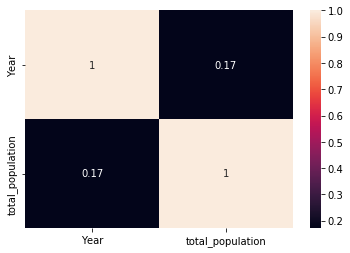

In [57]:
sns.heatmap(df.corr(),annot=True)

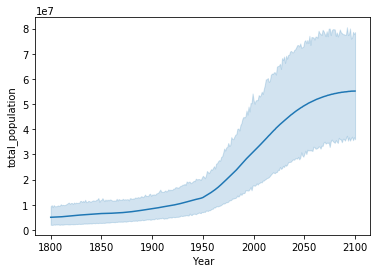

In [67]:
sns.lineplot(x='Year',y='total_population',data=df)

In [113]:
grouped_df = df.groupby(['country', 'Year'])['total_population'].sum().reset_index()
print(grouped_df)

           country  Year  total_population
0      Afghanistan  1800         3280000.0
1      Afghanistan  1801         3280000.0
2      Afghanistan  1802         3280000.0
3      Afghanistan  1803         3280000.0
4      Afghanistan  1804         3280000.0
...            ...   ...               ...
59292     Zimbabwe  2096        30900000.0
59293     Zimbabwe  2097        31000000.0
59294     Zimbabwe  2098        31000000.0
59295     Zimbabwe  2099        31000000.0
59296     Zimbabwe  2100        31000000.0

[59297 rows x 3 columns]


In [114]:
pivoted_df = grouped_df.pivot(index='country', columns='Year', values='total_population')
print(pivoted_df)

Year              1800       1801       1802       1803       1804       1805  \
country                                                                         
Afghanistan  3280000.0  3280000.0  3280000.0  3280000.0  3280000.0  3280000.0   
Albania       400000.0   402000.0   404000.0   405000.0   407000.0   409000.0   
Algeria      2500000.0  2510000.0  2520000.0  2530000.0  2540000.0  2550000.0   
Andorra         2650.0     2650.0     2650.0     2650.0     2650.0     2650.0   
Angola       1570000.0  1570000.0  1570000.0  1570000.0  1570000.0  1570000.0   
...                ...        ...        ...        ...        ...        ...   
Venezuela    1000000.0   978000.0   957000.0   936000.0   916000.0   896000.0   
Vietnam      4000000.0  4100000.0  4200000.0  4310000.0  4410000.0  4530000.0   
Yemen        2590000.0  2590000.0  2590000.0  2590000.0  2590000.0  2590000.0   
Zambia        747000.0   758000.0   770000.0   782000.0   794000.0   806000.0   
Zimbabwe     1090000.0  1090

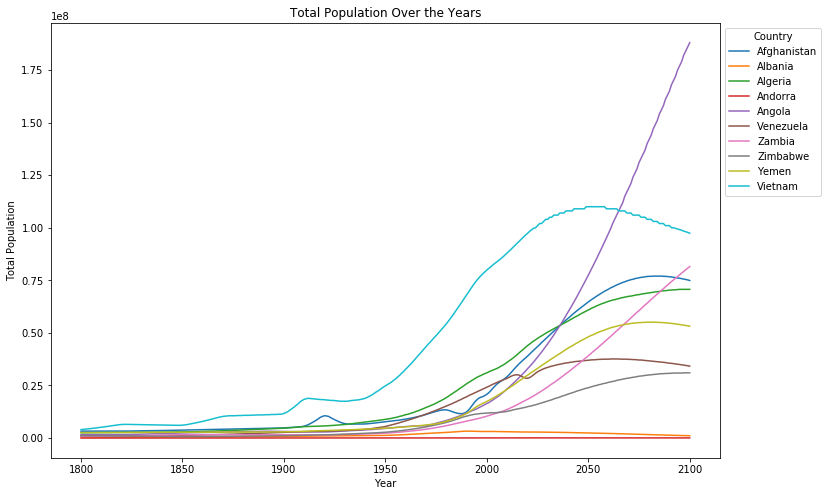

In [117]:
selected_countries = ['Afghanistan', 'Albania','Algeria', 'Andorra','Angola','Venezuela', 'Zambia', 'Zimbabwe','Yemen','Vietnam']

plt.figure(figsize=(12, 8))
for country in selected_countries:
    country_data = pivoted_df.T[country].reset_index()
    sns.lineplot(data=country_data, x='Year', y=country, label=country)

plt.ylabel('Total Population')
plt.title('Total Population Over the Years')
plt.legend(title='Country', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

In [130]:
min_population_country = df.loc[df['total_population'].idxmin(), 'country']
min_population_value = df['total_population'].min()

print(f"The country with the lowest total population is '{min_population_country}' with a population of {min_population_value}.")

The country with the lowest total population is 'Holy See' with a population of 645.0.


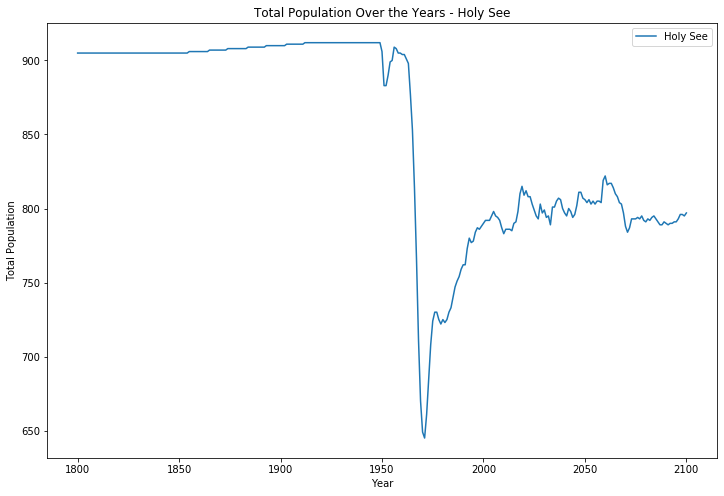

In [132]:
country_data = pivoted_df.T['Holy See'].reset_index()
plt.figure(figsize=(12, 8))
sns.lineplot(data=country_data, x='Year', y='Holy See', label='Holy See')
plt.xlabel('Year')
plt.ylabel('Total Population')
plt.title('Total Population Over the Years - Holy See')
plt.legend()
plt.show()

In [137]:
max_population_country = df.loc[df['total_population'].idxmax(), 'country']
max_population_value = df['total_population'].max()
print(f"The country with the highest total population is '{max_population_country}' with a population of {max_population_value}.")

The country with the highest total population is 'India' with a population of 1650000000.0.


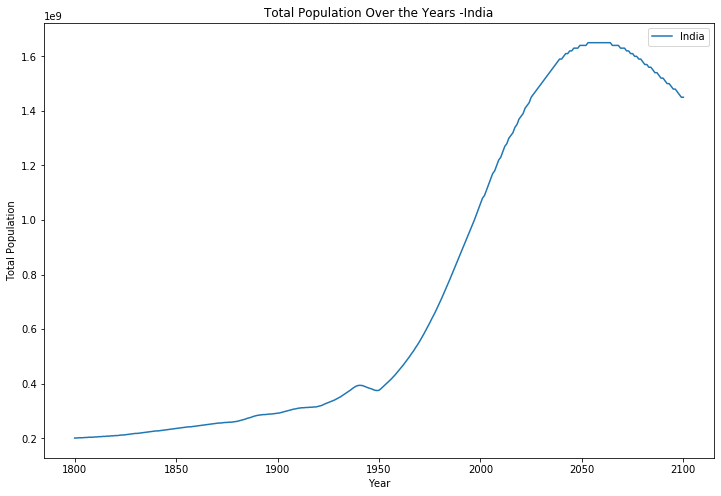

In [138]:
country_data = pivoted_df.T['India'].reset_index()
plt.figure(figsize=(12, 8))
sns.lineplot(data=country_data, x='Year', y='India', label='India')
plt.xlabel('Year')
plt.ylabel('Total Population')
plt.title('Total Population Over the Years -India')
plt.legend()
plt.show()

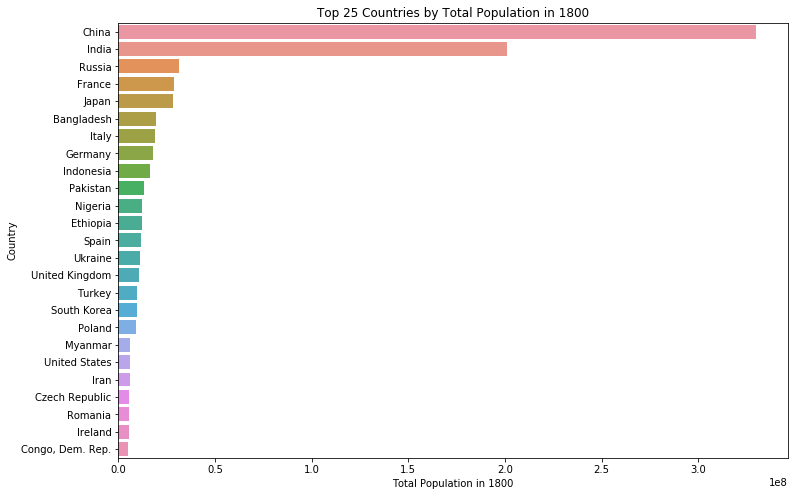

In [146]:
year_to_plot =1800
population_data = pivoted_df[[year_to_plot]].reset_index()
sorted_data = population_data.sort_values(by=year_to_plot, ascending=False)
top_25_data = sorted_data.head(25)
plt.figure(figsize=(12, 8))
sns.barplot(x=year_to_plot, y='country', data=top_25_data, orient='h')
plt.xlabel(f'Total Population in {year_to_plot}')
plt.ylabel('Country')
plt.title(f'Top 25 Countries by Total Population in {year_to_plot}')
plt.show()

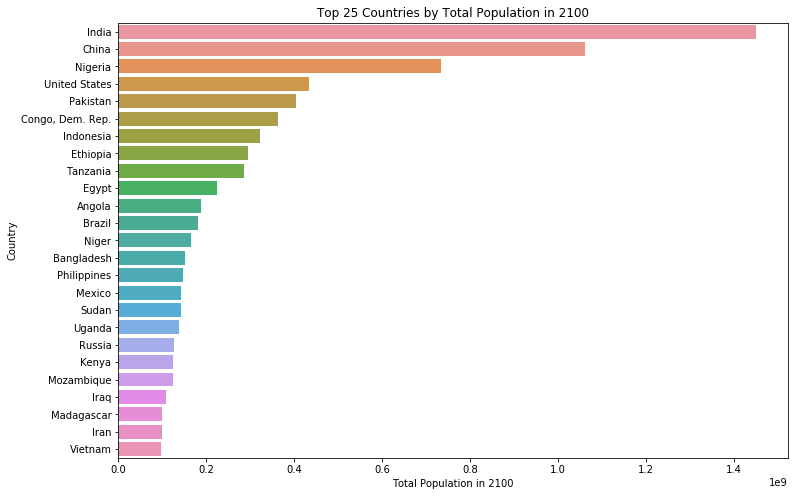

In [145]:
year_to_plot = 2100
population_data = pivoted_df[[year_to_plot]].reset_index()
sorted_data = population_data.sort_values(by=year_to_plot, ascending=False)
top_25_data = sorted_data.head(25)
plt.figure(figsize=(12, 8))
sns.barplot(x=year_to_plot, y='country', data=top_25_data, orient='h')
plt.xlabel(f'Total Population in {year_to_plot}')
plt.ylabel('Country')
plt.title(f'Top 25 Countries by Total Population in {year_to_plot}')
plt.show()